<h3>Загрузка бібліотек та датасету</h3>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter

# Load the data and set 'Period' as the index
data = pd.read_csv('Month_Value.csv')
data['Period'] = pd.to_datetime(data['Period'], format='%d.%m.%Y')
data.set_index('Period', inplace=True)
data

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-08-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN


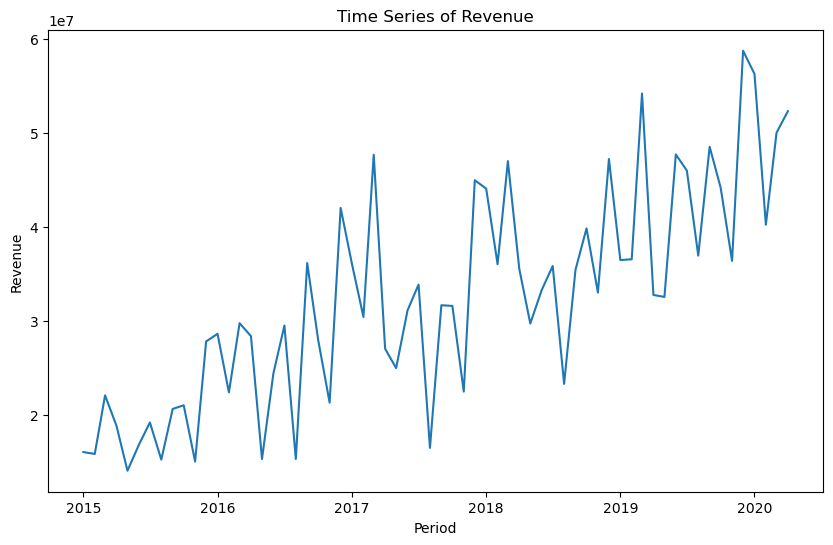

In [2]:
# Step 1: Візуалізувати ЧР
plt.figure(figsize=(10, 6))
plt.plot(data['Revenue'])
plt.title('Time Series of Revenue')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.show()

In [3]:
# Step 2: Приготувати дані
# Заміна середнім значенням NaN
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [4]:
# resample даних до щомісячної частоти та взяття середнього значення за цей період.
resampled_data = data.resample('M').mean()

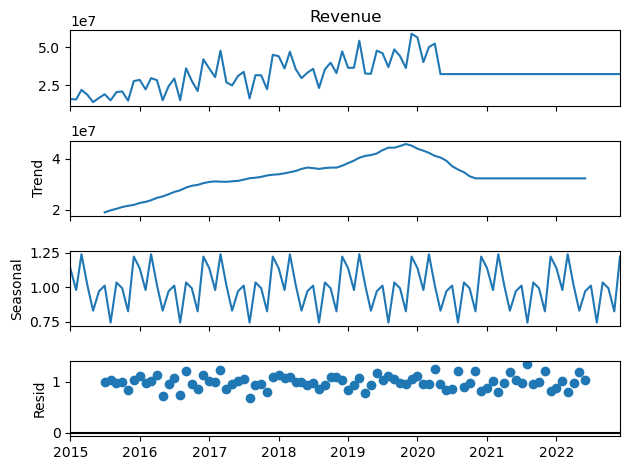

In [5]:
# Step 3: Сезонний аналіз
result = seasonal_decompose(data['Revenue'], model='multiplicative')
result.plot()
plt.show()

In [6]:
# Step 4: Декомпозиція часового ряду
decomposition = seasonal_decompose(data['Revenue'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

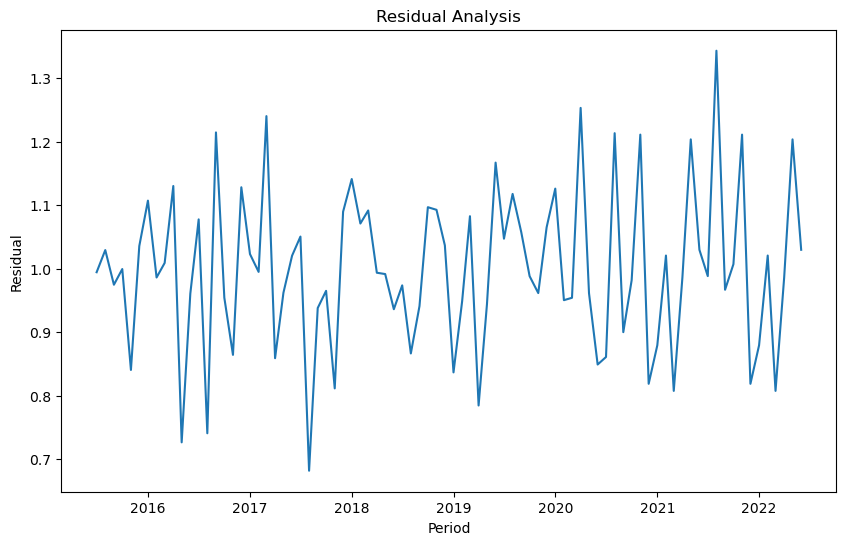

In [7]:
# Step 5: Аналіз залишків
plt.figure(figsize=(10, 6))
plt.plot(residual)
plt.title('Residual Analysis')
plt.xlabel('Period')
plt.ylabel('Residual')
plt.show()

In [8]:
# Step 6: Filtering "noisy" component
filtered_data = savgol_filter(data['Revenue'], 7, 3)  # You may need to adjust window size and polynomial degree

In [9]:
# Step 7: Apply smoothing techniques

# 7.1 Moving Average Smoothing
def moving_average_smoothing(series, window_size):
    return series.rolling(window=window_size).mean()

# Choose an appropriate window size
window_size_ma = 2
data['MA_Smoothed'] = moving_average_smoothing(data['Revenue'], window_size_ma)

# 7.2 Exponential Smoothing
model = ExponentialSmoothing(data['Revenue'], trend='add', seasonal='add', seasonal_periods=12)
smoothed_result = model.fit()
data['Exp_Smoothed'] = smoothed_result.fittedvalues

# 7.3 Savitzky-Golay Filter
# Choose an appropriate window size and polynomial degree
window_size_sg = 7
polynomial_degree_sg = 2
data['Filtered'] = savgol_filter(data['Revenue'], window_size_sg, polynomial_degree_sg)

C:\Users\amigo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\amigo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [10]:
data.fillna(data.mean(), inplace=True)

# Step 8: Evaluate the quality of the forecasts
mse_filtered = mean_squared_error(data['Revenue'], data['Filtered'])
print(f'Mean Squared Error для filtered часового ряду: {mse_filtered}')

mse_smoothed = mean_squared_error(data['Revenue'], data['MA_Smoothed'])
print(f'Mean Squared Error для smoothed часового ряду: {mse_smoothed}')

mse_exp_smoothed = mean_squared_error(data['Revenue'], data['Exp_Smoothed'])
print(f'Mean Squared Error для exp_smoothed часового ряду: {mse_exp_smoothed}')

Mean Squared Error для filtered часового ряду: 37095894983110.75
Mean Squared Error для smoothed часового ряду: 22292377196873.906
Mean Squared Error для exp_smoothed часового ряду: 30873176365971.74


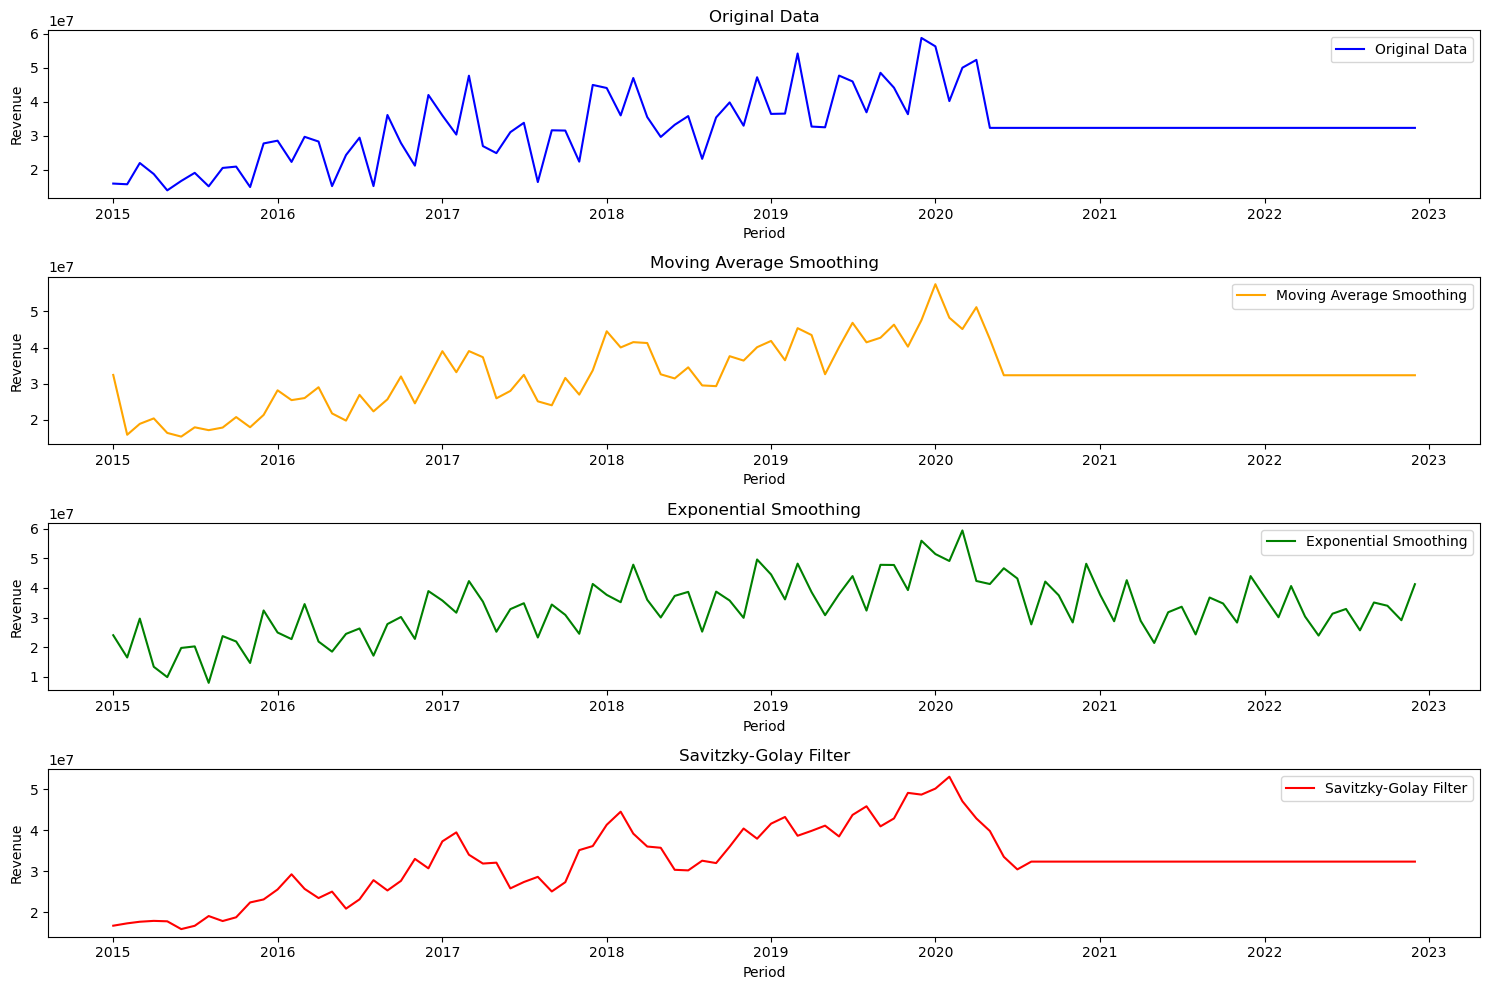

In [11]:
# Step 9: Visualize the results

plt.figure(figsize=(15, 10))

# Original Data
plt.subplot(4, 1, 1)
plt.plot(data['Revenue'], label='Original Data', color='blue')
plt.legend()
plt.title('Original Data')
plt.xlabel('Period')
plt.ylabel('Revenue')

# Moving Average Smoothing
plt.subplot(4, 1, 2)
plt.plot(data['MA_Smoothed'], label='Moving Average Smoothing', color='orange')
plt.legend()
plt.title('Moving Average Smoothing')
plt.xlabel('Period')
plt.ylabel('Revenue')

# Exponential Smoothing
plt.subplot(4, 1, 3)
plt.plot(data['Exp_Smoothed'], label='Exponential Smoothing', color='green')
plt.legend()
plt.title('Exponential Smoothing')
plt.xlabel('Period')
plt.ylabel('Revenue')

# Savitzky-Golay Filter
plt.subplot(4, 1, 4)
plt.plot(data['Filtered'], label='Savitzky-Golay Filter', color='red')
plt.legend()
plt.title('Savitzky-Golay Filter')
plt.xlabel('Period')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


In [12]:
data

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,MA_Smoothed,Exp_Smoothed,Filtered
Period,,,,,,,
2015-01-01,1.601007e+07,12729.000,1257.763541,3.002468e+07,3.244651e+07,2.402373e+07,1.670591e+07
2015-02-01,1.580759e+07,11636.000,1358.507000,3.002468e+07,1.590883e+07,1.651546e+07,1.727935e+07
2015-03-01,2.204715e+07,15922.000,1384.697024,3.002468e+07,1.892737e+07,2.962418e+07,1.767174e+07
2015-04-01,1.881458e+07,15227.000,1235.606705,3.002468e+07,2.043086e+07,1.338654e+07,1.788307e+07
2015-05-01,1.402148e+07,8620.000,1626.621765,3.002468e+07,1.641803e+07,9.897202e+06,1.777826e+07
...,...,...,...,...,...,...,...
2022-08-01,3.236045e+07,19197.375,1695.061159,2.869083e+07,3.236045e+07,2.566723e+07,3.236045e+07
2022-09-01,3.236045e+07,19197.375,1695.061159,2.869083e+07,3.236045e+07,3.505831e+07,3.236045e+07
2022-10-01,3.236045e+07,19197.375,1695.061159,2.869083e+07,3.236045e+07,3.396119e+07,3.236045e+07


In [13]:
# Вибрати лише стовпець 'Revenue'
revenue_column = data[['Revenue', 'MA_Smoothed', 'Exp_Smoothed', 'Exp_Smoothed']]

# Або видалити всі інші стовпці, залишивши тільки 'Revenue'
df = data[['Revenue', 'MA_Smoothed', 'Exp_Smoothed', 'Exp_Smoothed']]

In [14]:
df

,Revenue,MA_Smoothed,Exp_Smoothed,Exp_Smoothed
Period,,,,
2015-01-01,1.601007e+07,3.244651e+07,2.402373e+07,2.402373e+07
2015-02-01,1.580759e+07,1.590883e+07,1.651546e+07,1.651546e+07
2015-03-01,2.204715e+07,1.892737e+07,2.962418e+07,2.962418e+07
2015-04-01,1.881458e+07,2.043086e+07,1.338654e+07,1.338654e+07
2015-05-01,1.402148e+07,1.641803e+07,9.897202e+06,9.897202e+06
...,...,...,...,...
2022-08-01,3.236045e+07,3.236045e+07,2.566723e+07,2.566723e+07
2022-09-01,3.236045e+07,3.236045e+07,3.505831e+07,3.505831e+07
2022-10-01,3.236045e+07,3.236045e+07,3.396119e+07,3.396119e+07
